In [1]:
import os
os.chdir('c:\\hwpy\\')

Pandas kütüphanesini çıkartıyoruz ve veri setimizi yazdırıyoruz.

In [2]:
import pandas as pd
data = pd.read_csv('gasdata0920.csv')
pd.set_option('display.max_columns', None)
data

,GEO (Codes),GEO (Labels),2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,BE,Belgium,16.8200,14.7000,17.6000,19.1300,18.3200,18.2700,16.2300,15.1900,14.5114,14.8847,15.3755,13.7697
1,BG,Bulgaria,13.1404,10.2107,11.9440,13.7233,14.2397,13.6261,13.2580,10.2260,9.1778,10.5356,12.4631,11.0110
2,CZ,Czechia,13.7480,13.0395,15.1247,18.3111,17.8029,15.2285,15.9493,16.1879,15.2685,15.9675,16.2682,15.9069
3,DK,Denmark,22.2989,26.4979,28.6448,27.2187,27.5854,25.2216,25.5584,23.1489,24.6720,24.2095,23.7451,20.8287
4,DE,Germany (until 1990 former territory of the FRG),18.0000,15.7000,16.3400,17.7000,18.3500,18.8400,18.7800,18.3600,16.9800,16.9010,17.5503,16.5765
5,EE,Estonia,10.9601,10.0680,11.6400,13.8800,14.5700,13.6400,12.6700,9.6200,11.6133,11.1426,12.7321,12.2553
6,IE,Ireland,17.8900,13.7900,14.1400,17.0600,18.1500,18.9200,18.7000,18.1200,17.5600,17.5565,18.9702,18.5834
7,EL,Greece,NaN,NaN,NaN,NaN,21.4400,20.0900,18.9200,15.6800,15.5500,14.7900,15.4049,13.4132
8,ES,Spain,16.9800,14.8321,14.8900,18.3700,20.3400,20.9000,20.3200,18.8200,18.5200,18.4751,20.4438,19.9309
9,FR,France,15.2900,14.4600,16.1100,17.6300,18.8300,19.4700,19.4600,18.0500,17.7413,18.4662,20.4950,19.9882


Almanyanın ismini düzeltiyoruz.

In [3]:
data.at[4,"GEO (Labels)"] = "Germany"

NaN değer içeren satırları kaldırıyor ve NaN değer içermeyen verilerle yeni bir DataFrame oluşturuyoruz.

In [4]:
import numpy as np
data.dropna(thresh=3, inplace=True)## nan değer içeren bütün satırlar kaldırıldı
nndata = data.copy(deep=True)
nndata.dropna(inplace=True) 
nndata["avgat"] = nndata.iloc[:,2:].mean(axis=1)## her ülke için tüm yıllar için ortalaması bulundu ve avgat sütununa yazdırıldı
nndata["avgl5"] = nndata.iloc[:,9:14].mean(axis=1) ## her ülke için son 5 yılın ortalaması bulundu ve avgl5 sütununa yazdırıldı 
nndata.sort_values(by="avgat", ascending=False, inplace=True) ## veri seti ortalamalara göre yeniden sıralandı
nndata.reset_index(drop=True, inplace=True)
nndata

,GEO (Codes),GEO (Labels),2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,avgat,avgl5
0,SE,Sweden,24.2680,27.8848,32.9372,32.6035,34.0880,32.8982,31.4312,31.3541,33.6762,32.0246,32.8557,27.2216,31.103592,31.42644
1,DK,Denmark,22.2989,26.4979,28.6448,27.2187,27.5854,25.2216,25.5584,23.1489,24.6720,24.2095,23.7451,20.8287,24.969158,23.32084
2,NL,Netherlands,22.4900,18.8900,19.1500,20.5700,21.9600,21.9100,21.0000,21.6500,21.2000,22.6482,25.5701,27.6403,22.056550,23.74172
3,PT,Portugal,16.7800,16.4910,16.9500,20.5200,23.2300,25.9600,27.1100,25.3500,21.4700,21.0716,21.1189,21.8115,21.488583,22.16440
4,IT,Italy,21.0410,17.1480,19.2700,21.3600,23.1700,22.1400,21.2700,20.3200,19.5600,19.8447,21.3645,20.2286,20.559733,20.26356
5,AT,Austria,18.0300,17.2900,19.2900,21.0500,21.3200,20.7800,20.2800,19.1700,18.7100,18.5850,18.3400,17.9895,19.236208,18.55890
6,ES,Spain,16.9800,14.8321,14.8900,18.3700,20.3400,20.9000,20.3200,18.8200,18.5200,18.4751,20.4438,19.9309,18.568492,19.23796
7,FR,France,15.2900,14.4600,16.1100,17.6300,18.8300,19.4700,19.4600,18.0500,17.7413,18.4662,20.4950,19.9882,17.999225,18.94814
8,DE,Germany,18.0000,15.7000,16.3400,17.7000,18.3500,18.8400,18.7800,18.3600,16.9800,16.9010,17.5503,16.5765,17.506483,17.27356
9,IE,Ireland,17.8900,13.7900,14.1400,17.0600,18.1500,18.9200,18.7000,18.1200,17.5600,17.5565,18.9702,18.5834,17.453342,18.15802


Veri setinin özeti.

In [5]:
nndata.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,avgat,avgl5
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,15.307856,14.228240,15.564820,17.120556,17.780076,17.405300,17.048332,15.884904,15.195292,15.292176,16.200320,15.331048,16.029910,15.580748
std,4.321012,4.900165,5.657751,5.476087,5.554701,5.617033,5.529781,5.654648,6.026542,5.817756,5.972264,5.668396,5.311606,5.741590
min,8.113900,7.638000,7.898100,7.517100,7.911400,8.579800,8.651300,9.224800,7.176700,5.988000,5.532500,6.650300,8.457017,6.934520
25%,11.837000,10.632600,11.944000,13.880000,14.052100,13.626100,13.258000,11.470000,10.490000,11.090000,12.463100,11.011000,12.065950,11.049740
50%,14.540600,13.790000,14.890000,17.060000,17.802900,16.656700,16.230000,15.361400,14.511400,14.884700,15.375500,13.769700,15.733583,14.746260
75%,18.000000,16.176800,17.600000,20.520000,20.340000,20.780000,20.280000,18.820000,18.520000,18.475100,20.443800,19.930900,18.568492,18.948140
max,24.268000,27.884800,32.937200,32.603500,34.088000,32.898200,31.431200,31.354100,33.676200,32.024600,32.855700,27.640300,31.103592,31.426440


Matpotlib kütüphanesini kullanarak avgat sütunu için kutu grafiği çizdireceğiz, sonra normal dağılıma sahip olup olmadığına bakacağız.

<AxesSubplot:>

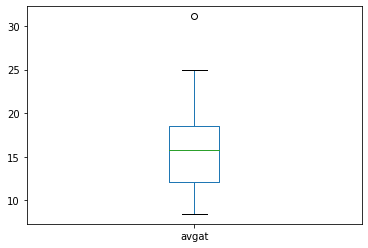

In [6]:
import matplotlib.pyplot as plt
nndata['avgat'].plot(kind='box')

Bakılınca normal dağılıma sahip olup olmadığını pek söyleyemeyiz. Fakat bakılınca sola eğik bir dağılıma sahiptir. Yani ülkelerin genel ortalamasının sola eğik olduğunu ve çok az bir aykırı değer olduğunu görüyoruz. Doğal olarak tam bir şekilde normal dağılıma sahip olup olamadığımızı göremeyiz. Bu yüzden küçük bir normallik testi ile anlayabiliriz.

In [7]:
import scipy.stats as stats
normald = nndata['avgat']
print(f"Eğiklik >0 ise sola, <0 ise sağa yatıktır. Basıklık >0 ise dik, <0 ise eğiktir.")
print(f"Eğiklik: {stats.skew(normald)} Basıklık: {stats.kurtosis(normald)}")
print(f"Eğer p-value > 0.05 ise normal dağılıma sahip, p-value < 0.05 ise normal dağılıma sahip değildir.")
print(f"T: {stats.shapiro(normald)[0]} P-Value: {stats.shapiro(normald)[1]}")

Eğiklik >0 ise sola, <0 ise sağa yatıktır. Basıklık >0 ise dik, <0 ise eğiktir
Eğiklik: 0.9216083680103376 Basıklık: 0.7985858176755984
Eğer p-value > 0.05 ise normal dağılıma sahip, p-value < 0.05 ise normal dağılıma sahip değildir
T: 0.9312335848808289 P-Value: 0.09280242770910263


Görüldüğü gibi genel ortalamayı kullanarak veri setimizin aslında normal dağılma sahip olduğunu, sadece eğiklik ve kutu grafiğinin bize kesin bir sonuç veremeyeceğini anlıyoruz.

<AxesSubplot:>

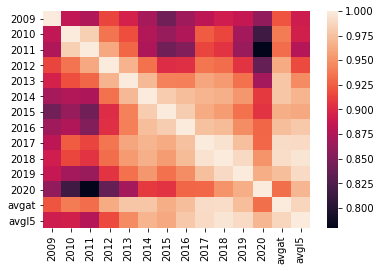

In [8]:
import seaborn as sns
sns.heatmap(nndata.corr())

Baktığımızda ısı haritası grafiğinin yardımı ve pearson'ın korelasyon methodunu basit haliyle uyguladığımızda; en az korelasyonun 2011 ile 2020 arasında olduğunu yani birbirine en az bağımlı verilerin 2011 ile 2020 arasında olduğunu söyleyebiliriz. Fakat görüldüğü gibi hiçbir şekilde negatif korelasyon yoktur.

Matplot kütüphanesini çıkartıyoruz ve 5'erli her ülke için çizgi grafiğini yazdırıyoruz.

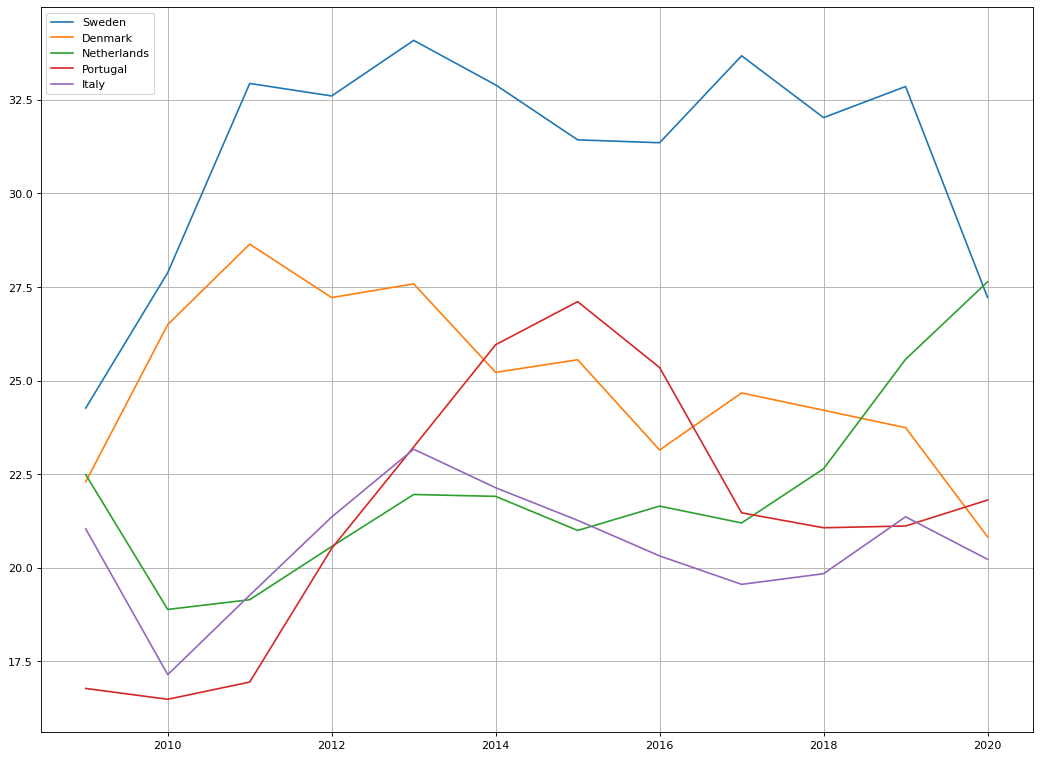

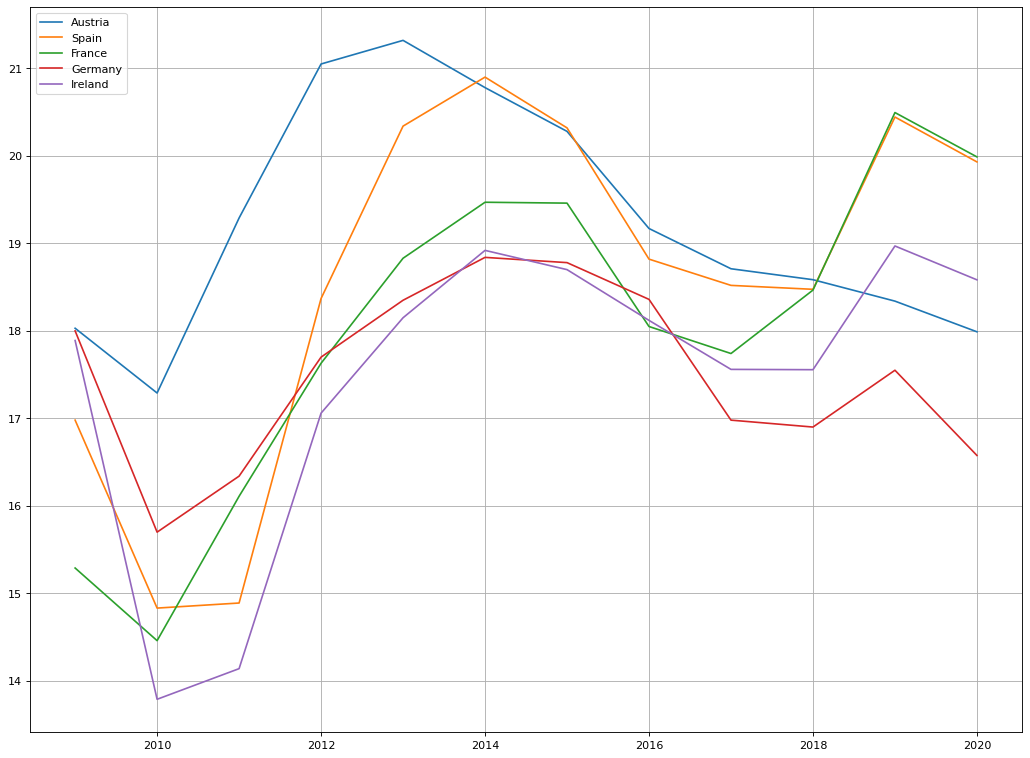

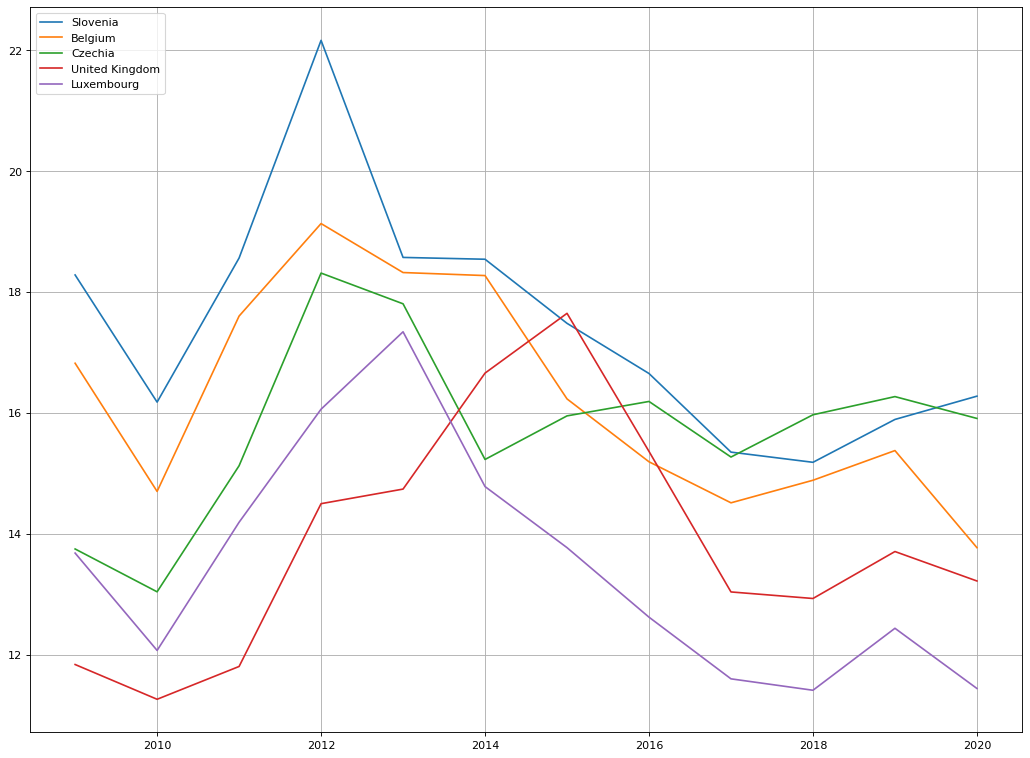

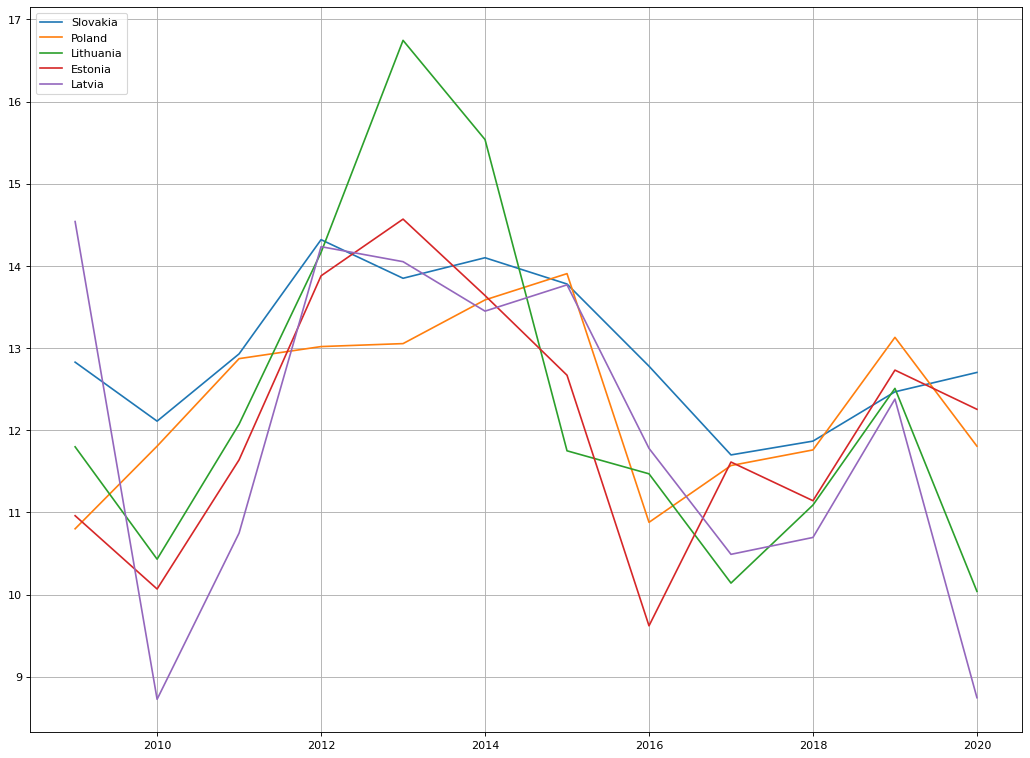

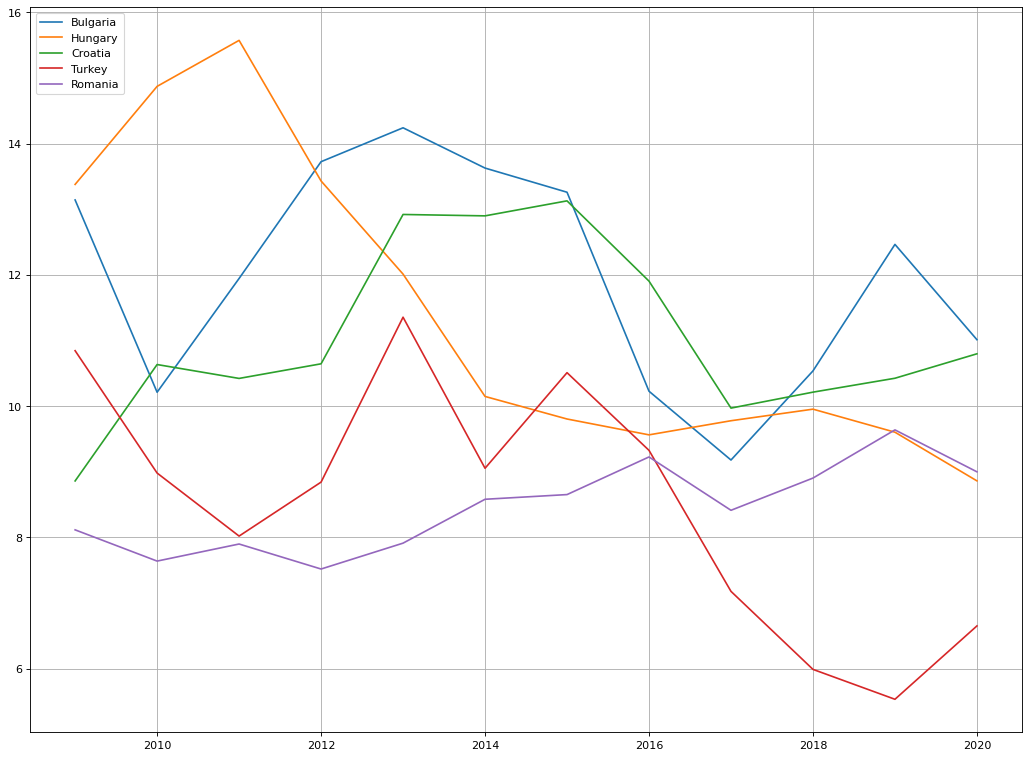

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
i=0
x=1
while i < len(nndata):
   figure(figsize=(16, 12), dpi=80)
   while i < 5*x: 
       plt.plot(np.arange(2009,2021),nndata.iloc[i,2:14],label = nndata.iloc[i,1])
       i=i+1
   plt.legend(loc="upper left")
   plt.grid()
   plt.show()
   x = x+1

Türkiye'nin son 5 yıldaki verilerini çıkartıyoruz.

In [10]:
last5years = ["2016","2017","2018","2019","2020"]
turkey = nndata.copy()
turkey = turkey[turkey["GEO (Codes)"]=="TR"]
turkey.drop(turkey.columns.difference(last5years),axis=1, inplace=True)
turkey

,2016,2017,2018,2019,2020
23,9.3251,7.1767,5.988,5.5325,6.6503


Tüm ülkelerin son 5 yıldaki verilerinin ortalamasının ortalamasını uygulayacağımız test için bulduk.

In [11]:
avgall5year = nndata.loc[:,"avgl5"].mean()
print(avgall5year)

15.580747999999996


Burada amacımıza ulaşmak için One Sample T-Testini uygulayacağız.

In [12]:
import scipy.stats as stats
oneSample_result = stats.ttest_1samp(turkey.T, popmean=avgall5year)
result = {"Test Statistic":oneSample_result[0][0],
          "p-Value":oneSample_result[1][0]}
result

{'Test Statistic': -13.097440430075064, 'p-Value': 0.00019620646155173516}

Çıkan sonuçlara göre hipotezimizin doğruluğu aşağıdaki gibidir.

In [13]:
if result["p-Value"]/2.0 < 0.05 and result["Test Statistic"] > 0:
    print("H0 = Son 5 yılda Türkiye'deki tüketicilerin gigajoule başına ödediği Euro bazında ücret, son 5 yılda Avrupa'daki ülkelerin ödediği Euro bazında ücrete eşittir.")
else:
    print("H1 = Son 5 yılda Türkiye'deki tüketicilerin gigajoule başına ödediği Euro bazında ücret, son 5 yılda Avrupa'daki ülkelerin ödediği Euro bazında ücretten azdır.")

H1 = Son 5 yılda Türkiye'deki tüketicilerin gigajoule başına ödediği Euro bazında ücret, son 5 yılda Avrupa'daki ülkelerin ödediği Euro bazında ücretten azdır.


Amacımıza\Hipotezimize ulaştık ve görsel olarak da bunu göstermek için çizgi grafiğini çizdik.

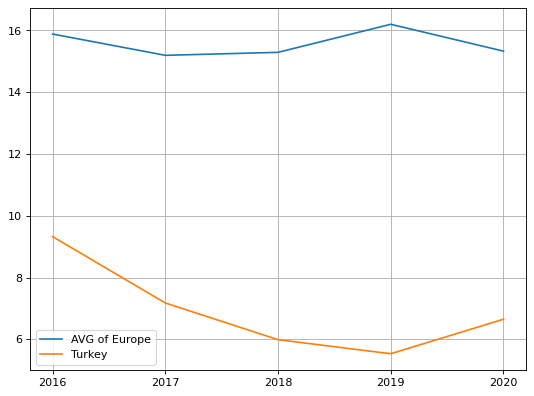

In [14]:
last5avg = []
for col in last5years:
    last5avg.append(nndata.loc[:,col].mean())
trlast5 = turkey.iloc[0].to_numpy()

y1 = last5avg
y2 = trlast5

figure(figsize=(8, 6), dpi=80) 
plt.plot(last5years, y1, label = "AVG of Europe")
plt.plot(last5years, y2, label = "Turkey")
plt.legend()
plt.grid()
plt.show()